In [42]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.cross_validation import train_test_split
style.use('fivethirtyeight')

In [36]:
from sklearn.datasets import load_digits
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.cross_validation import train_test_split

In [37]:
digits = load_digits()
X = digits.data
y = digits.target

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [6]:
svm_model = SVC()

In [7]:
score = cross_val_score(svm_model,X,y,cv=10,scoring='accuracy')
print(score.mean())

0.487051912078


In [25]:
svm_vanilla = SVC(gamma=0.001)
svm_vanilla.fit(X_train,y_train)
y_pred = svm_vanilla.predict(X_test)
print(y_pred[:10])

[1 5 0 7 1 0 6 1 5 4]


In [26]:
print(accuracy_score(y_test,y_pred))
print(svm_vanilla.get_params)

0.991111111111
<bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)>


In [27]:
svm_model = SVC()
c_opt = list(np.linspace(0.7,1.4,4))
gamma_opt = list(np.linspace(0.000,0.004,4))
param_grid=dict(C=c_opt,gamma=gamma_opt)
grid = GridSearchCV(svm_model,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
%time grid.fit(X_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

CPU times: user 624 ms, sys: 229 ms, total: 854 ms
Wall time: 19.2 s
0.990348923534
{'gamma': 0.0013333333333333333, 'C': 0.93333333333333324}


In [29]:
y_pred = grid.predict(X_test)
print(accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

0.993333333333


array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 52,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 47,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 47,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 37,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 48]])

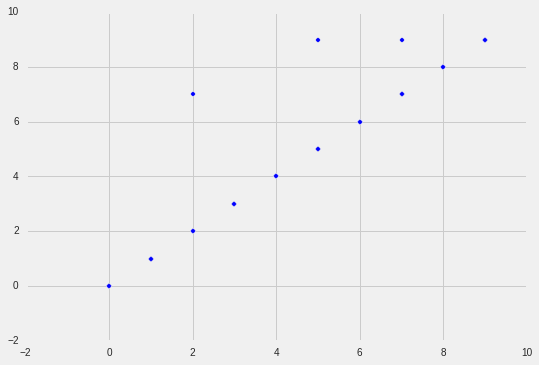

In [43]:
plt.scatter(y_test,y_pred,cmap='spring')

In [44]:
plt.contour?